# **Quiz 5 Review**
-----

# Week 8 Material (Unsupervised Learning)
---

# K-Means Clustering & DBSCAN

### Define Supervised Learning and Unsupervised Learning.
**Supervised**
- Known Target (Y) variable that we are trying to use the X feature matrix in order to predict.
**Unsupervised**
- Target variable is unknown and we are trying to better understand how our X features relate to themselves.

### Identify strategies for Unsupervised Learning.
- Pick a proxy Y, then do supervised learning.
    - Proxy target maybe something like who would a resident vote for had they voted.
    
- Use unsupervised learning as a stepping stone to supervised learning.
    - Create marketing segmentations for product consumers.
    
- Try to organize Observations by features.
    - Dimensionality reduction instead of using all 20 or 100 features, are there common 5 or 6 combinations that can be represented by clusters/eigenvectors.
    
    
    
### Identify problems when Unsupervised Learning can be applied.
- **Network Analysis** : This feeds into anomaly detection and identifying aspects of a network that just don't fit.

- **Dimensionality reduction (Principal Component Analysis)** : A very powerful and useful tactic for reducing the complexity of your models is dimensionality reduction.  This finds a way to shrink down the number of features we have by finding the combinations of features and representing features as combinations. "Rather than having 10 weather features, we figure out types of days "Hot and Humid", "Stormy", etc and we use those rather than all the other features like air pressure, temperature, precipitation, wind speed.

- **Clustering** : Pretty straight forward, we are breaking our data up into clusters or dividing by similarities.  This is greater for inference because we break our data up, but it is up to the data scientist to attempt to understand the core aspects of the cluster.

- **Topic Modeling** : Topic modeling is pretty cool in that you can, apply it to text data and identify core groups of words that are used together and thus interpret them and assign topics.


----

### Understand basic Unsupervised clustering problems.
- We can apply clustering in order to identify or understand groupings or patterns in our data that are potentially undefined or unknown yet...

### Perform a K-Means Clustering Analysis.
- K-Means clustering analysis is used to identify/create K number of cluster.
- This is an iterative algorithm that updates itself until coming to a convergence (or exceeds number of iterations)
    1. K number of centroids are randomly initialized on the data.
    2. All values/observations are assigned to the centroid that they are closest to.  
    3. The values/observations have now been clustered in the first iteration.  
    4. For each of these clusters, a center value is calculated.
    5. The centroid then moves to that center value.
    6. All values/observations then re-calculate which of the new centroids they are closest to and are then re-clustered.
    7. This process repeats until the centroid converges (doesn't move between iterations) or exceeds the maximum number of iterations passed.


### Evaluate Clusters for fit.

**Dense clusters and/or clusters with large separation are good fits.**
- Dense clusters are the result of having a very small distance between points in the cluster.
- Inertia : Used to evaluate density of a cluster

- Clusters with large separation have a large boundary, with few or no points separating the edge of the cluster.
- Silhouette Score : Used to evaluate the distance between clusters.

_Unlike, previously defined metrics, a higher score is not always best and these terms can be biased given our data and the clustering type and hyperparameters being used._

#  DBSCAN and Cluster Comparison


### What is DBSCAN?
- Density Based Spatial Clustering of Applications with Noise


### How does DBSCAN work?
- DBSCAN requires two parameters by which it builds the clusters off of.
    1. Epsilon : The radius (distance) from a point by which other points will be considered.
    2. Min Samples : Number of samples needed to start a cluster. 

1. DBSCAN starts by picking a random value/observation to begin from. A "hub node" so to speak.
2. From this "Hub Node" it used epsilon to create a reach distance of all other points to consider or try to draw into its cluster.
3. If there are a number of observations equal to or greater than the Min Samples passed that exist within the drawn reach created by Epsilon, a cluster will be created. 
4. Once a cluster begins, it starts to "swallow" other observations and amass in size.
5. Once a point is added to a cluster it then uses epsilon to identify all the non-clustered/swallowed points that exists within its epsilon reach and adds those to the cluster. 
6. Once a clusters reach is exhausted (there are no unclustered points within the epsilon reach of any of the clustered values) a new, un-swallowed, "Hub Node" is identified and the clustering process starts over again, swallowing all unclustered values/observations.

### How does DBSCAN compare to K-Means and Hierarchical Clustering?

**K-Means**
- Con : Not very good for identifying data that exists in odd shapes or patterns.  
- Pro : Good for Gaussian/normally distributed data.
- Pro : Customizable in that we can specify the number of clusters we want to end with up front.

**DBSCAN**
- Pro : Useful for dense data
- Pro : Good for non-normally distributed data (oddly shaped clusters)
- Con : Requires black box tuning of Epsilon and Min Samples in order to create the ideally representative clusters.  

# Principal Component Analysis


### Differentiate between feature elimination and feature extraction.
- Feature eliminate we **drop** features from our model.
- With feature extraction we **combined** our existing features to make new features that represent the same data but in a different way.  Because all the "new" features contain elements of previous features we can drop some of the new features without losing much or any of the variance they're capable of explaining.

### Describe the PCA algorithm.
- PCA uses EigenVectors and EigenValues in order to identify the directions within the data that explain the combination of the data.
    - The way that I comprehend this is think about a line of best fit for a linear regression model, it is designed to explain the relationship between two (or more features).  The line of best fit is a single dimension explaining two or more dimensions.  You can think of this as PC1.  PC2 is that normal error around the line that does not follow the line of best fit perfectly.
    
    
### Identify use cases for PCA.
- PCA is used for dimensionality reduction
    - Image processing
    - Many variables with high multicollinearity
    - 100 + variables
    - Situations where number of features are greater than number of observations.

### Implement PCA in scikit-learn.
### Calculate and interpret proportion of explained variance.



In [7]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

bost = load_boston()
boston = pd.DataFrame(data = bost.data, columns = bost.feature_names)

In [14]:
pca = PCA()
pca = pca.fit(boston)

In [16]:
var_exp  =  pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [8.05814643e-01 1.63050854e-01 2.13486883e-02 6.95695814e-03
 1.30786367e-03 7.27742761e-04 4.20024207e-04 2.48721489e-04
 8.53904192e-05 3.08110199e-05 6.65495193e-06 1.56785857e-06
 7.96571657e-08]
Cumulative explained variance:  [0.80581464 0.9688655  0.99021419 0.99717114 0.99847901 0.99920675
 0.99962677 0.9998755  0.99996089 0.9999917  0.99999835 0.99999992
 1.        ]


In [ ]:
# we can get this down to 3 principal components and explain almost
# all the variance that the original 12 features could

# Recommender Systems

----


### Explain common recommendation techniques
**Collaborative based**
- Based on a users behavior
    - User Based : Compares similarities of users to other users. "Other people that enjoyed The Office also enjoyed Parks and Rec"
    - Similarity vector reduces the original rating of dissimilar users the most and similar user the least 

    
**Content based**
- Based on Items attributes
    - Item Based : Measures similarities between items that a user has interacted with in the past. "Based on your interest in the Harry Potter books you may like to read The Lord of the Rings"
    
### Types of data used for recommendation, and their tradeoffs
**Explicit**
- Data that you ask a user to provide
    - User rating
    - User Search
    - User Ranking
    - Wish Lists

**Implicit**
- Data which you collect from user interactions.
    - How does a user click through a site
    - How long do they stay on a specific page
    - List of movies an individual has watched.
    - How quickly did they go through a series.


# Week 9 Material (Time Series)
---

# 9.01 Intro to Time Series Data

### 1. Understand how to turn the date into the index
### 2. Understand and implement the following pandas methods:
- `.rolling()`
- `.diff()`
- `.pct_change()`
- `.shift()`

In [1]:
# import relevant modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import r2_score

# import the bus ridership data
bus = pd.read_csv('../data/bus.csv')
bus.head()

,date,bus_ridership
0,1973-01-01,648
1,1973-02-01,646
2,1973-03-02,639
3,1973-04-02,654
4,1973-05-02,630


In [2]:
# When read in, date column are string objects
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
date             114 non-null object
bus_ridership    114 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [3]:
# convert date into datetime objects
bus['date'] = pd.to_datetime(bus['date'])

In [4]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
date             114 non-null datetime64[ns]
bus_ridership    114 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [5]:
# change index of dataframe to the date
bus = bus.set_index('date')

In [6]:
bus.head()

,bus_ridership
date,
1973-01-01,648
1973-02-01,646
1973-03-02,639
1973-04-02,654
1973-05-02,630


### `.rolling()`
> Allows for rolling statistics (ie. "I want the average of the past 7 days' ridership")
- **`window`** : the "length" or the period of the window
- **`min_periods=None`** : Min number of observations in a window
- **`win_type=None`** : Type of window

In [7]:
bus['SevenDayTotal'] = bus['bus_ridership'].rolling(window = 7).sum()
bus['WeeklyAverage'] = bus['bus_ridership'].rolling(window = 7).mean()

In [8]:
bus.head(10)

,bus_ridership,SevenDayTotal,WeeklyAverage
date,,,
1973-01-01,648,NaN,NaN
1973-02-01,646,NaN,NaN
1973-03-02,639,NaN,NaN
1973-04-02,654,NaN,NaN
1973-05-02,630,NaN,NaN
1973-06-02,622,NaN,NaN
1973-07-02,617,4456.0,636.571429
1973-08-02,613,4421.0,631.571429
1973-09-02,661,4436.0,633.714286


### `.diff()`
> The literal subtraction between day x and the period specified
- **`periods`** : With what time before you subtract from
    - `periods = 1` : Subtracting from previous day
    - `periods = 7` : Subtracting from exactly 7 days ago

In [9]:
bus['DailyDiff']  = bus['bus_ridership'].diff()
bus['WeeklyDiff'] = bus['bus_ridership'].diff(7)

bus.head()

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff
date,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN
1973-03-02,639,NaN,NaN,-7.0,NaN
1973-04-02,654,NaN,NaN,15.0,NaN
1973-05-02,630,NaN,NaN,-24.0,NaN


### `.pct_change()`
> Percent change for the period specified

In [10]:
bus['DailyDiffPCT'] = bus['bus_ridership'].pct_change()

bus.head()

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff,DailyDiffPCT
date,,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN,-0.003086
1973-03-02,639,NaN,NaN,-7.0,NaN,-0.010836
1973-04-02,654,NaN,NaN,15.0,NaN,0.023474
1973-05-02,630,NaN,NaN,-24.0,NaN,-0.036697


### `.shift()`
> Just shifts the days down by specified period

In [11]:
bus['DailyOffset']  = bus['bus_ridership'].shift(1)
bus['WeeklyOffset'] = bus['bus_ridership'].shift(7)

bus.head(10)

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff,DailyDiffPCT,DailyOffset,WeeklyOffset
date,,,,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN,-0.003086,648.0,NaN
1973-03-02,639,NaN,NaN,-7.0,NaN,-0.010836,646.0,NaN
1973-04-02,654,NaN,NaN,15.0,NaN,0.023474,639.0,NaN
1973-05-02,630,NaN,NaN,-24.0,NaN,-0.036697,654.0,NaN
1973-06-02,622,NaN,NaN,-8.0,NaN,-0.012698,630.0,NaN
1973-07-02,617,4456.0,636.571429,-5.0,NaN,-0.008039,622.0,NaN
1973-08-02,613,4421.0,631.571429,-4.0,-35.0,-0.006483,617.0,648.0
1973-09-02,661,4436.0,633.714286,48.0,15.0,0.078303,613.0,646.0


# 9.02 Principles of Time Series

### 1. Define time series and cross-sectional data.

- **Time series data**
> Data where indices is time (collected over time)
- **Cross-sectional data**
> Data at one point in time

### 2. Describe forecasting, some of its challenges, and when it's advised.

> Predicting a future estimate for a target variable

- What are some challenges to consider when using time series data?
> 1. As we forecast farther out, accuracy starkly decreases
> 2. Changes will be compounded in future forecasts
> 3. Is the data available, and how much?

### 3. Generate and interpret time plots.

In [12]:
# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data (this will be relevant later)!
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

In [13]:
bus.head()

,bus_ridership
1973-01-31,648
1973-02-28,646
1973-03-31,639
1973-04-30,654
1973-05-31,630


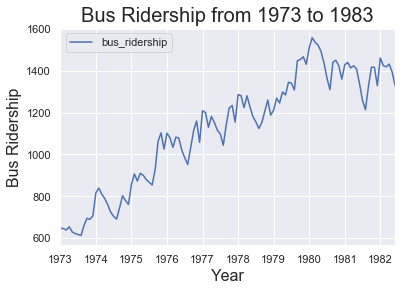

In [14]:
# Thanks, Sean Bjork!
sns.set()

bus.plot()
plt.title('Bus Ridership from 1973 to 1983', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Bus Ridership', fontsize = 16);

### 4. Define and identify trend, seasonality, and cyclic patterns in time series data.

- **Trends** : 
> patterns over time, long-term changes; most trends are linear or quadratic
- **Seasonality** :
> fluctuations over a "fixed and known" interval
- **Cyclic** :
> fluctuactions over "unknown and irregular" intervals

In [15]:
bus.head()

,bus_ridership
1973-01-31,648
1973-02-28,646
1973-03-31,639
1973-04-30,654
1973-05-31,630


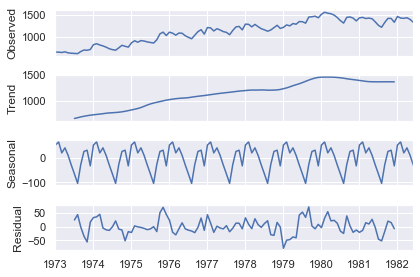

In [16]:
# This will always try to find some kind of seasonality
decomp = seasonal_decompose(bus['bus_ridership'])
decomp.plot();

### 5. Calculate, plot and interpret autocorrelation and partial autocorrelation.

- **Autocorrelation (or ACF) plots** :
> How correlated one row (time) is to the one before it (or some other specified time)
- **Partial autocorrelation (or PACF) plots** : 
> Autocorrelation but ignoring previous correlations already accounted for

- Interpreting ACF (autocorrelation) and PACF (partial autocorrelation) plots
    - Y axis = level of correlation
    - X axis = Number of lags away.
    - Shaded blue area = region of uncertainty

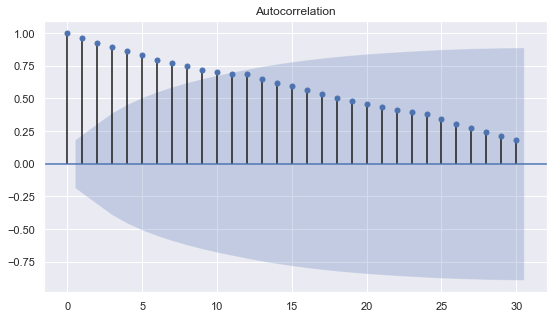

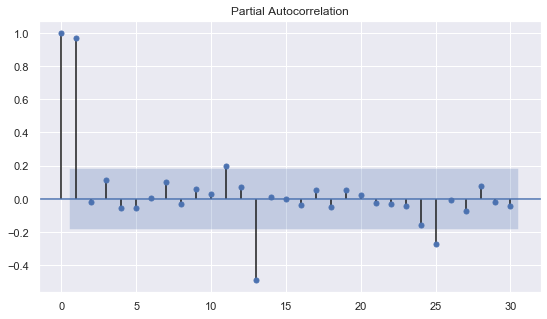

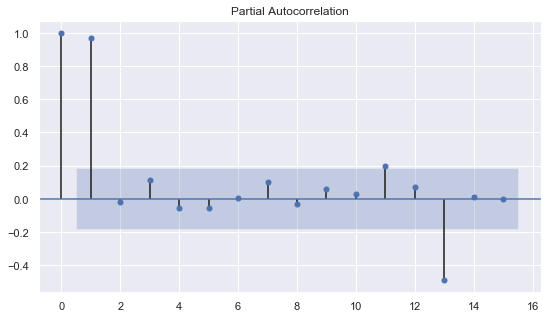

In [17]:
fig, ax = plt.subplots(figsize = (9, 5))
plot_acf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 15, ax = ax)
plt.show();

### 6. Properly fit, generate predictions from, and evaluate a linear time series model.

In [18]:
# make bus_ridership into float values
# (p,q), p is the AR part
bus['bus_ridership'] = bus['bus_ridership'].astype(float)

# fit an AR model with a lag of 1
ar1 = ARMA(endog = bus['bus_ridership'],
           order = (1, 0))

model = ar1.fit()

# generate predicted values
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.9364431877685966

In [19]:
# fit a MA model with a window of 1
# (p,q), q is the MA part
ma1 = ARMA(endog = bus['bus_ridership'],
           order = (0, 1))

model = ma1.fit()
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.6553314322628319

# 9.03-9.04 ARIMA

### 1. Define stationarity.

> Data that is detrended, mean is constant, line of best fit is horizontal

### 2. Conduct and interpret an augmented Dickey-Fuller test for stationarity.

In [20]:
from statsmodels.tsa.stattools import adfuller

# Original code written by Joseph Nelson
def interpret_dftest(series):
    return pd.Series(adfuller(series)[0:2], index=['Test Statistic','p-value'])

In [21]:
# Not stationary
interpret_dftest(bus['bus_ridership'])

Test Statistic   -1.536597
p-value           0.515336
dtype: float64

In [22]:
# First difference
interpret_dftest(bus['bus_ridership'].diff().dropna())

Test Statistic   -1.938696
p-value           0.314082
dtype: float64

In [23]:
# Second difference
interpret_dftest(bus['bus_ridership'].diff().diff().dropna())

Test Statistic   -1.247869e+01
p-value           3.126378e-23
dtype: float64

In [24]:
bus['second_diff_ridership'] = bus['bus_ridership'].diff().diff()
bus.head()

,bus_ridership,second_diff_ridership
1973-01-31,648.0,NaN
1973-02-28,646.0,NaN
1973-03-31,639.0,-5.0
1973-04-30,654.0,22.0
1973-05-31,630.0,-39.0


### 3. Construct integrated autoregressive moving average (ARIMA) models.

- Integrating AR and MA models results in an ARIMA model
- Useful when we want to model _longer term data with sudden fluctuations_

### 4. Describe when autoregressive models and moving average models are appropriate.

**Autoregressive (AR - p) models** :
> Better for long-term trends
- Number of previous observations to consider when predicting (lags)

**Moving average (MA - q) models** :
> Better for short-term fluctuations
- Number of errors we regress on

**Integrated (d)**
- How many differences we need to achieve stationarity

### 5. Identify the optimal values of parameters $p$, $d$, and $q$ through GridSearch.

# 9.05 Benford's Law

### 1. Understand what Benford's law is

> Numbers with a smaller first digit are more frequent

> Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

### 2. Use Benford's law to find anomalies within a dataset.

> convert numbers into strings, check count of first character (leading digit)

---

# Week 10 Material (Bayesian Statistics)
---

#  Intro to Bayes & Bayesian Inference

### Recognize and describe the axioms and properties of probability.
1. The probability of any event is a non-negative real number.
2. The probability of an entire sample space is 1.
3. Mutually Exclusive Events (Empty Intersection of events)
    - The probability of these mutually exclusive events occurring is the sum of all their probabilities.
    - $P(A \cup B) = P(A) + P(B)$


### Describe Bayes' theorem.
- Bayes Theorm is based on conditional probability in that events considered are not mutually exclusive.
- Rather than calculating how likely an event is to happen, we calculate how likely an event is to happen given a prior piece of knowledge or understanding (The Prior).

With frequentist statistics, everytime we flip a coin the odds of it being heads or tails are equal 50/50, however as a human you may think that after a coin is a flipped and tails is observed that there is a better chance on the next flip or getting a heads. 
### Explain the diachronic interpretation of Bayes' theorem.
- Comes from the Greek words for "Through Time", in that Bayesian analysis has a "through time" consideration.  As events occur in time so should our understanding of the results influenced by them.

### Solve some Bayesian statistics problems.

**Monte Hall**
- There is a game show with 3 doors.  Behind 2 of the doors are goats and behind 1 is a car.
- Contestant pick a door. One of the two remaining doors is opened to reveal a goat.
- Contestant is then asked whether they want to keep their current door or select the other non opened door.
- Intuition makes us believe that every door has an equal opportunity of having a goat/car behind it, so all things considered the odds of the car being behind the current door or the other option is the same.
- **Enter Bayes**, however its not. 


**Bayes Example**  
You work at a financial services company that offers individual retirement accounts (IRAs). To target high potential customers, you want to find out if people with children are more likely to invest in IRAs.
So far you have found:

- 30% of all Americans have IRAs.
- half of Americans have children.
- two-thirds of those with IRAs have children.
- Based on this information, what is the probability that someone with children has an IRA?

Answer:

- $P(ira) = 0.30$  
- $P(child) = 0.50$
- $P(child|ira) = 0.66$


$P(ira | child) = \frac{P(child|ira) \cdot P(ira)}{P(child)}$

$ 0.198= \frac{0.66 \cdot 0.30}{0.50}$


Probability of an American having an IRA _given_ they have a child is 0.396 (approx. %40).  
$P(ira | child) = 0.396$

In [26]:
(0.66*0.3 )/0.5

0.396

### Describe the relationship among parameter, statistic, sample, and population

|   |   |
| --- | --- |
| **Population** : The whole / every member that exists in a group (_all_ students at OSU) | **Parameter** : Value that tells us something about a _population_ (Such as Mean, Median or Mode). |
| **Sample** : Portion taken from the population. (Use a random number generator to select 2000 students from enrollment records) | **Statistic** : Value that tells us something about a _sample_ (Such as Mean, Median or Mode). |



### Understand how Bayesian Inference connects Bayesian Probability.
- Similar to the way we use information to update a belief with Bayesian Probability, we use new information to update the previous.
- With Bayesian Probability we calculate a single probability of an event given the outcome of another event.
- Bayesian inference is used the same way but instead of a single probability being estimated, we're applying it or a probability distribution. 
    - Does our understanding of a probability distribution of some event

### Describe the Posterior Distribution.
- The posterior distribution is the result of taking the prior distribution and the observed observation and combining them so that we come to an updated distribution.


## $$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} \Rightarrow f(\theta |y) = \frac{P(y|\theta)P(\theta)}{P(y)}$$

**$f(\theta)$** : Distribution of $\theta$ given no supplemental information
    - Prior Distribution/Belief
**$f(y|\theta)$** : Likelihood Function relating $\theta$ to $y$
    - The "Likelihood"
**$f(y)$** : normalizing constant to ensure $f(\theta |y)$ is a valid probability.
    - Marginal Likelihood of $y$.

Posterior is a compromise of the prior and the likelihood.


### Identify methods for choosing a prior and a likelihood.
- If prior beliefs are too strong, our posterior will be dominated by the prior.
- if prior beliefs are too vague, our posterior will be dominated by the data.
- conjugacy between your prior and likelihood
- likelihood dist should only influence the posterior , develop prior first and then add likelihood

**Prior**
Our prior distribution should summarize our beliefs about P (our distribution) _prior_ to seeing any data.
- Often times we can manipulate the Beta distribution family to find a continuous distribution that we believe represents how we think the distribution exists. (Manipulation of A and B creates different distributions.

**Likelihood**
The likelihood function to model how the data are generated.
- We're going to learn about the maximum likelihood estimate later in the week which is beneficial for identifying the optimal likelihood for the data.

### Understand how simulations play such a large role in Bayesian Inference.
- conjugacy is limiting, using simulation allows use to use more complicated distribution combinations
- computer powers allow more complex problems


# Monte Carlo Markov Chains (MCMC)

**Basic:** MCMC allows us to leverage computers to do Bayesian statistics.

**Intermediate:** MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution

### Identify the Markov property.
- Markov Chains are a way for us to see how random varaibles change or move from one state to another over time.
- We use these to study on average how likely an event will happen.

$$
f(X_{t+1}|X_t) = f(X_{t+1}|X_t, X_{t-1}, X_{t-2}, \ldots, X_1)
$$

It doesn't matter what happened before time $t$ every event has the same possible probabilities for outcomes or paths to take for time $t+1$.  Essentially, once a chain has started the event that came before it does not affect the probabilities of what will come next.
TL;DR of __Markov Property__: if i know what is happening at time t, i know just as much about what will happen at t+1, without having to back to t=1.


### Describe Monte Carlo simulations.
- powerful way to model complex systems by generating random numbers

### Describe how MCMC works.
- MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution.

- Monte Carlo Methods
    - large random sampling process to generate numerical results 
- Markov Chains
    - when we sample random numbers, we're going to rely on the previous random number to help randomly generate the next one
- Acceptance Rejection Sampling
    - specific type of Monte Carlo
    - decide to keep or discard it 
    - Keeps in going in the right direction
    
### Identify situations where MCMC is beneficial.
- helpful in cases when we don't have conjugate priors/posteriors


# PyMC & Bayesian Regression

### Fit models in PyMC.
- MCMC creates a posterior distributions and then samples a large number of times from it

In [27]:
import pymc3 as pm
import pandas as pd
df = pd.read_csv('../data/heights.csv', index_col=0)

model = pm.Model()

In [28]:
# Set priors for parameters
# these are 3 potential posterior distributions that we're going to sample from
with model:
    beta_0 = pm.Normal('beta_0', mu=0, sd=5) # normal dist, mean of 0 STD of 5

    
    beta_1 = pm.Normal('beta_1', mu=1, sd=0.2) # normal dist, mean 1 STD of 0.2

    
    sigma = pm.Uniform('sigma', lower=0, upper=8) # uniform dist, min 0, max 8

In [29]:
# Set likelihood function.
with model:
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs',
                      mu = beta_0 + beta_1*df['Mheight'], 
                      sd = sigma,
                      observed = df['Dheight'])

In [30]:
with model:
    map_estimate = pm.find_MAP(model=model)
    trace = pm.sample(10000, tune=1000, start = map_estimate, chains = 2)

/Users/adibronshtein/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -3,097.2, ||grad|| = 0.047534: 100%|██████████| 33/33 [00:00<00:00, 1409.63it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_1, beta_0]
Sampling 2 chains: 100%|██████████| 22000/22000 [03:32<00:00, 103.73draws/s]
The acceptance probability does not match the target. It is 0.8835480776041877, but should be close to 0.8. Try to increase the number of tuning steps.


### Interpret traceplots and posterior distributions.

In [31]:
% matplotlib inline
pm.traceplot(trace);


UsageError: Line magic function `%` not found.


In [ ]:
pm.summary(trace).round(2)

In [ ]:
(0.4*0.6)/0.33

# Conjugacy, Maximum Likelihood

### Define conjugacy.
- Basically our prior and posterior distributions are the same or follow the same trends.  If this occurs they prior and posterior can be referred to as Conjugate Distributions.
- You can think of this as a situation in which the likelyhood confirms our assumption about our prior, further supporting that hypothesis and strengthening the certainty in said distribution.


### Maximum Likelihood

**Understand the Beta Distribution**
- distribution of probabilites, binary choice and their probabilities

**Describe the concept of "conjugacy" and "conjugate priors" in Bayesian statistics**
- conjugate priors are the linked distribution that allow simple calculations

**Calculate the Maximum Likelihood Estimate**
- highest point in the posterior distribution

**Use the Beta-Binomial model to build our example in a Bayesian framework**
- combining a beta prior with a binomial likelihood can generate a beta posterior within Bayesian terms

---